# <center><h1><b>Introduction</b></h1></center>
<p>
Gliomas represent the most prevalent primary brain tumors and are categorized as either LGG (Lower-Grade Glioma) or GBM (Glioblastoma Multiforme) based on histological and imaging criteria. The grading process is significantly influenced by both clinical and molecular/mutation factors. However, molecular tests, although valuable for precise diagnosis, can be costly for glioma patients.
Within our dataset, we have focused on the 20 most frequently mutated genes and three clinical features extracted from the TCGA-LGG and TCGA-GBM brain glioma projects.

Our objective is to identify the key variables that can effectively indicate the early signs of LGG (Lower-Grade Glioma).
</p>

# <center><h1><b>Analysis</b></h1></center>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#LGG (Lower-Grade Glioma) or GBM (Glioblastoma Multiforme)
#The Cancer Genome Atlas.
df = pd.read_csv('TCGA_GBM_LGG_Mutations_all.csv',header = 0)

In [3]:
df.head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [4]:
#Taking Grade either as 'LGG' or 'GBM'
dataset = df[(df['Grade'] == 'LGG') | (df['Grade'] == 'GBM')]
#Removing dataset where Gender is '--'
dataset = dataset[dataset['Gender']!='--']

In [5]:
#Convert Gender column in binary format
dataset['Gender'] = dataset['Gender'].map(lambda x: 0 if x in 'Female'else 1)
#Convert Grade column in binary format 0 for GBM and 1 for LGG
dataset['Grade'] = dataset['Grade'].map(lambda x: 0 if x in 'GBM'else 1)

In [6]:
#=======================Converting age in years (numerical) value=========================================
def age_in_years(age):
    words = age.split()
    #Initialize variables to store the years and days
    years = 0
    days = 0
    # Loop through the words and extract the years and days
    for i in range(len(words)):
        if words[i] == "years":
            years = int(words[i - 1])
        elif words[i] == "days":
            days = int(words[i - 1])
    # Convert the days into years (assuming 365 days in a year)
    years += days / 365
    return years
#==========================================================================================================

In [7]:
#Applying 'age_in_years' function for 'Age_in_years' column.
dataset['Age_in_years'] = dataset['Age_at_diagnosis'].apply(age_in_years)

In [8]:
#Create age column if age is less than the average years of patient 0 else 1
dataset['Age'] = dataset['Age_in_years'].map(lambda x: 0 if x < dataset['Age_in_years'].mean() else 1)

In [9]:
#Dropping columns which cannot be used for Predictive Model
dataset.drop(columns = ['Age_at_diagnosis','Project','Case_ID','Primary_Diagnosis'],axis = 1, inplace = True)

In [10]:
#==========Creating a method to convert the String values 'MUTATED' to 1 and 'NOT_MUTATED' to 0========
def binary_conversion(data):
    if data == 'MUTATED':
        return 1
    else:
        return 0
#======================================================================================================

In [11]:
#===========Applying binary_conversion method to 20 attributes containing genes related information========
dataset['IDH1'] = dataset['IDH1'].map(binary_conversion)
dataset['TP53'] = dataset['TP53'].map(binary_conversion)
dataset['ATRX'] = dataset['ATRX'].map(binary_conversion)
dataset['PTEN'] = dataset['PTEN'].map(binary_conversion)
dataset['EGFR'] = dataset['EGFR'].map(binary_conversion)
dataset['CIC'] = dataset['CIC'].map(binary_conversion)
dataset['MUC16'] = dataset['MUC16'].map(binary_conversion)
dataset['PIK3CA'] = dataset['PIK3CA'].map(binary_conversion)
dataset['NF1'] = dataset['NF1'].map(binary_conversion)
dataset['PIK3R1'] = dataset['PIK3R1'].map(binary_conversion)
dataset['FUBP1'] = dataset['FUBP1'].map(binary_conversion)
dataset['RB1'] = dataset['RB1'].map(binary_conversion)
dataset['NOTCH1'] = dataset['NOTCH1'].map(binary_conversion)
dataset['BCOR'] = dataset['BCOR'].map(binary_conversion)
dataset['CSMD3'] = dataset['CSMD3'].map(binary_conversion)
dataset['SMARCA4'] = dataset['SMARCA4'].map(binary_conversion)
dataset['GRIN2A'] = dataset['GRIN2A'].map(binary_conversion)
dataset['IDH2'] = dataset['IDH2'].map(binary_conversion)
dataset['FAT4'] = dataset['FAT4'].map(binary_conversion)
dataset['PDGFRA'] = dataset['PDGFRA'].map(binary_conversion)
#==========================================================================================================

In [12]:
#=================Removing 'not reported' value from Race column====================
dataset = dataset[dataset['Race']!='not reported']
#===================================================================================

In [13]:
#=====================Create dummy variables for Race column=======================
dataset = pd.get_dummies(dataset, columns=['Race'])
#==================================================================================

In [14]:
def con_bool_to_int(s):
    if s is True:
        s = 1
    else:
        s = 0
    return s

In [15]:
#==================================Renaming multiple columns===============================================
dataset = dataset.rename(columns={'Race_american indian or alaska native': 'NativeAmerican', 'Race_black or african american': 'AfricanAmerican'})

In [16]:
dataset['NativeAmerican'] = dataset['NativeAmerican'].map(con_bool_to_int)
dataset['Race_asian'] = dataset['Race_asian'].map(con_bool_to_int)
dataset['AfricanAmerican'] = dataset['AfricanAmerican'].map(con_bool_to_int)
dataset['Race_white'] = dataset['Race_white'].map(con_bool_to_int)

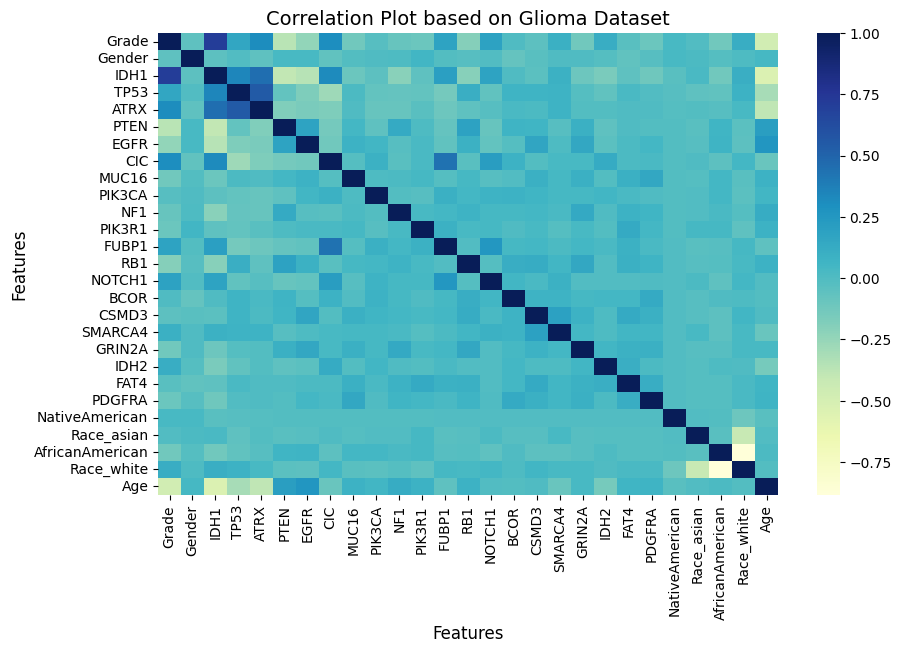

In [17]:
#========================Creating correlation matrix for the Glioma datastet==================================
columns = ['Grade', 'Gender', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC',
       'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR',
       'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA',
       'NativeAmerican', 'Race_asian', 'AfricanAmerican', 'Race_white', 'Age']

correlation_matrix = dataset[columns].corr()
# Create a correlation plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(correlation_matrix, cmap='YlGnBu')
# Add plot title and adjust font size
plt.title('Correlation Plot based on Glioma Dataset', fontsize=14)
# Set the font size of the axis labels
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Show the plot
plt.show()
#==========================================================================================================

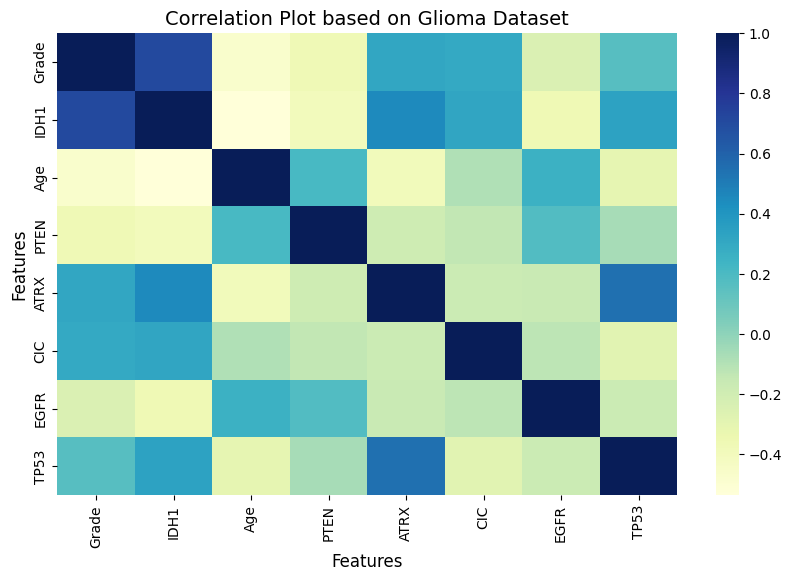

In [18]:
columns = ['Grade','IDH1', 'Age','PTEN','ATRX','CIC', 'EGFR', 'TP53']
correlation_matrix = dataset[columns].corr()
# Create a correlation plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(correlation_matrix, cmap='YlGnBu')
# Add plot title and adjust font size
plt.title('Correlation Plot based on Glioma Dataset', fontsize=14)
# Set the font size of the axis labels
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Show the plot
plt.show()

In [19]:
#======================Import library to split the dataset into train and test data, GridSearchCV===========
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
#importing accuracy score, R square
from sklearn.metrics import accuracy_score, roc_curve, auc
#importing classification report and confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
#==========================================================================================================

In [20]:
#==================Predictor Variables=====================================
columns = ['IDH1', 'Age','ATRX','CIC']
X1 = dataset[columns]

X  = MinMaxScaler().fit_transform(X1)
#===================Output Variable========================================
Y = dataset['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)
num_features = X.shape[1]

In [21]:
train_set = [ 0.9, 0.5]

In [22]:
accuracies = []
lr_pred_ls = []
rf_pred_ls = []
ab_pred_ls = []
svm_pred_ls = []
pred_pqsvc = []
auc_cal = []
cm_cal = []

## Logistic Regression

In [23]:
#=====================Logistic Regression Model with different training sets================
for elm in train_set:
    clf_LR = LogisticRegression(solver='lbfgs', max_iter=100)
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)

    # Fitting the classifier to the training data
    clf_LR.fit(X_t, y_t)
    
    # Making predictions on the testing data
    y_pred_LR = clf_LR.predict(X_test)
    
    # Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_LR)
    
    print(f'Accuracy score(Logistic Regression Model): {accuracy} with {elm*100}% training records')

Accuracy score(Logistic Regression Model): 0.8571428571428571 with 90.0% training records
Accuracy score(Logistic Regression Model): 0.8611111111111112 with 50.0% training records


In [24]:
#============================Hyper-parameter tuning for Logistic Regression==============================
param_grid = { 'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l2']}
grid_search = GridSearchCV(clf_LR, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")
#=======================================================================================================

Best hyperparameters: {'C': 1, 'penalty': 'l2'}


In [25]:
for elm in train_set:
    clf_LR = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'])
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)

    # Fitting the classifier to the training data
    clf_LR.fit(X_t, y_t)
    
    # Making predictions on the testing data
    y_pred_LR = clf_LR.predict(X_test)
    y_pred_proba_LR = clf_LR.predict_proba(X_test)[:, 1]  # Predicted probabilities for positive class
    lr_pred_ls.append(y_pred_LR)
    
    # Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_LR)
    accuracies.append(['Logistic Regression',f'{elm*100}%', accuracy])
    
    print(f'Accuracy score(Logistic Regression Model): {accuracy} with {elm*100}% training records')

Accuracy score(Logistic Regression Model): 0.8571428571428571 with 90.0% training records
Accuracy score(Logistic Regression Model): 0.8611111111111112 with 50.0% training records


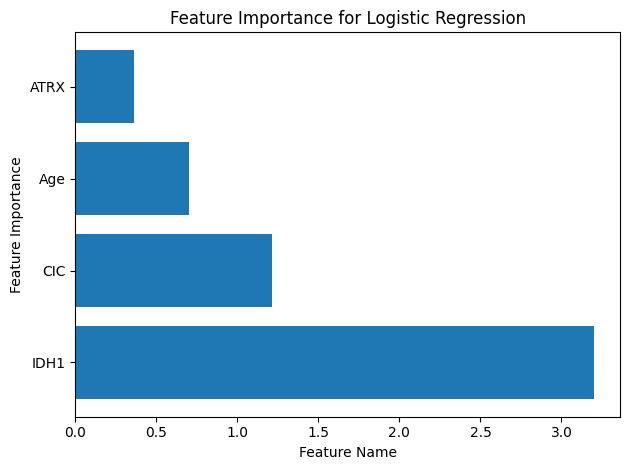

In [26]:
#======================Feature Importance based on Logistic Regression=========================================================================
# Get the coefficients
coefficients = clf_LR.coef_[0]
# Sort the coefficients by absolute value
sorted_coefficients = sorted(zip(X1.columns, coefficients), key=lambda x: abs(x[1]), reverse=True)

# Create the feature importance graph
feature_names = [x[0] for x in sorted_coefficients]
feature_importances = [abs(x[1]) for x in sorted_coefficients]
plt.barh(feature_names,feature_importances)
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Logistic Regression')
plt.tight_layout()
plt.show()
#==========================================================================================================

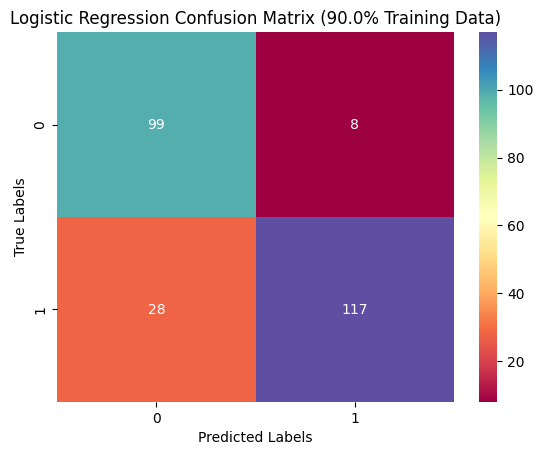

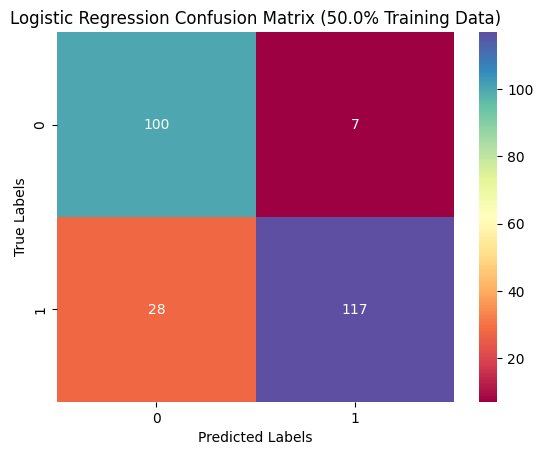

In [27]:
#=======================Calculate the confusion matrix for Logistic Regression Model====================================
for i in range(len(train_set)):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, lr_pred_ls[i])
    cm_cal.append(['Logistic Regression',f'{train_set[i]*100}%', cm])
    # Create a heatmap of the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Logistic Regression Confusion Matrix ({train_set[i]*100}% Training Data)')
    plt.show()
#=====================================================================================================================

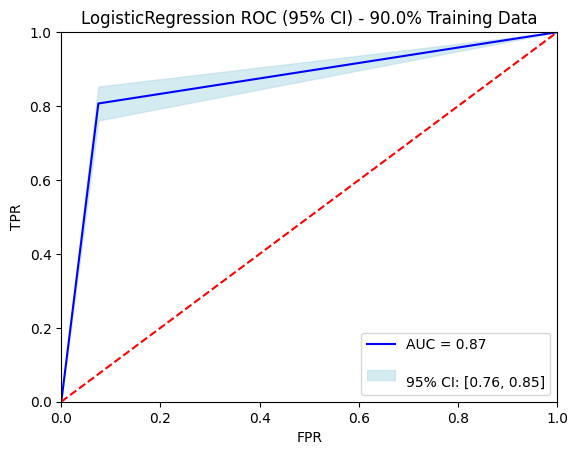

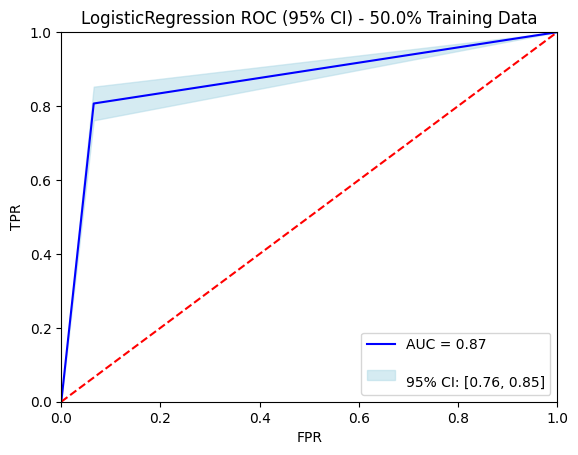

In [28]:
for i in range(len(train_set)):
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, lr_pred_ls[i])
    roc_auc = auc(fpr, tpr)
    auc_cal.append(['Logistic Regression',f'{train_set[i]*100}%', roc_auc])
    # Compute the confidence interval
    std_err = np.sqrt(np.divide(tpr * (1 - tpr), y_test.size, where=(y_test.size != 0)) * (fpr + tpr))
    # Compute the confidence interval with explicit broadcasting
    upper_bound = tpr + std_err * 1.96
    lower_bound = tpr - std_err * 1.96
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,label = '\n95%% CI: [%0.2f, %0.2f]' % (lower_bound[1], upper_bound[1]))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'LogisticRegression ROC (95% CI) - {train_set[i]*100}% Training Data')
    plt.legend(loc="lower right")
    plt.show()

## Random Forest

In [29]:
#=====================Random Forest Model with different training sets=====================
for elm in train_set:
    clf_RF = RandomForestClassifier(n_estimators = 300, max_depth = 10,  min_samples_split = 10)
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)
    # Fitting the classifier to the training data
    clf_RF.fit(X_t, y_t)
    # Making predictions on the testing data
    y_pred_RF = clf_RF.predict(X_test)
    # Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_RF)
    print(f'Accuracy score(Random Forest Model): {accuracy} with {elm*100}% training records')
#=======================================================================================================

Accuracy score(Random Forest Model): 0.8571428571428571 with 90.0% training records
Accuracy score(Random Forest Model): 0.8531746031746031 with 50.0% training records


In [30]:
#=========================Hyper-parameter Tuning of Random Forest=========================================
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(estimator=clf_RF, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, Y)
best_params = grid_search.best_params_
#==========================================================================================================

In [31]:
best_params

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}

In [32]:
#=====================Random Forest Model with different training sets=====================
for elm in train_set:
    clf_RF = RandomForestClassifier(n_estimators = best_params['n_estimators'], max_depth = best_params['max_depth'],  min_samples_split = best_params['min_samples_split'])
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)
    # Fitting the classifier to the training data
    clf_RF.fit(X_t, y_t)
    # Making predictions on the testing data
    y_pred_RF = clf_RF.predict(X_test)
    rf_pred_ls.append(y_pred_RF)
    
    # Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_RF)
    accuracies.append(['Random Forest',f'{elm*100}%', accuracy])
    print(f'Accuracy score(Random Forest Model): {accuracy} with {elm*100}% training records')
#=======================================================================================================

Accuracy score(Random Forest Model): 0.8571428571428571 with 90.0% training records
Accuracy score(Random Forest Model): 0.8531746031746031 with 50.0% training records


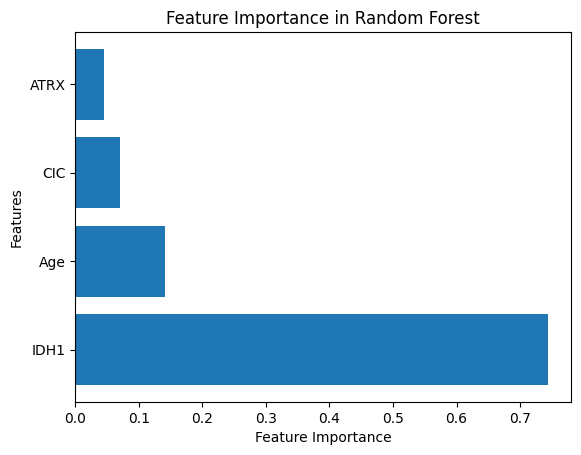

In [33]:
#=======================Feature Importance based on Random Forest Classifier===============================
feature_importances = clf_RF.feature_importances_
# Create a DataFrame to visualize the importances
importance_df = pd.DataFrame({'Feature': X1.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()
#==========================================================================================================

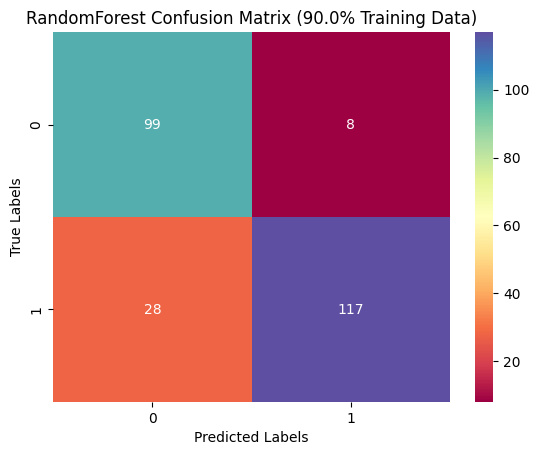

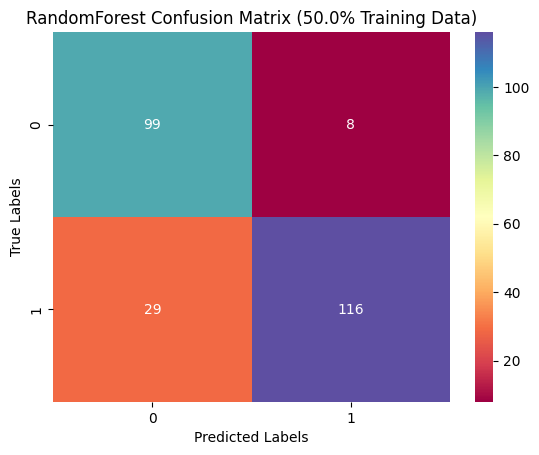

In [34]:
#=======================Calculate the confusion matrix for Random Forest Model====================================
for i in range(len(train_set)):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, rf_pred_ls[i])
    cm_cal.append(['Random Forest',f'{train_set[i]*100}%', cm])
    # Create a heatmap of the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'RandomForest Confusion Matrix ({train_set[i]*100}% Training Data)')
    plt.show()
#==========================================================================================================

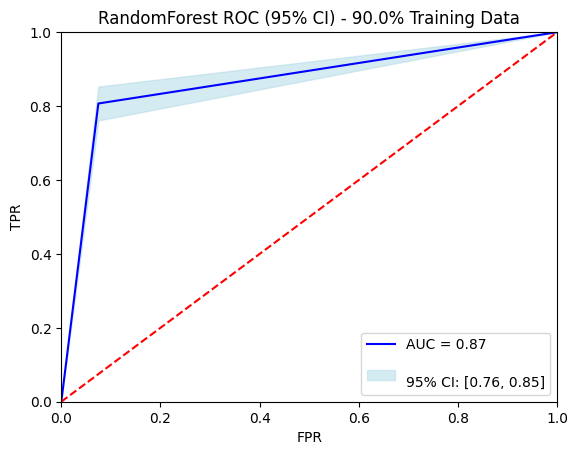

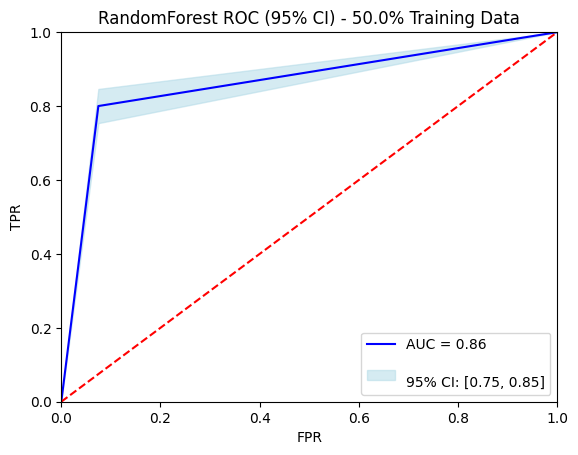

In [35]:
#=================Plotting ROC curve based on Random Forest====================(By Abhishek)
for i in range(len(train_set)):
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, rf_pred_ls[i])
    roc_auc = auc(fpr, tpr)
    auc_cal.append(['Random Forest',f'{train_set[i]*100}%', roc_auc])
    # Compute the confidence interval
    std_err = np.sqrt(np.divide(tpr * (1 - tpr), y_test.size, where=(y_test.size != 0)) * (fpr + tpr))
    # Compute the confidence interval with explicit broadcasting
    upper_bound = tpr + std_err * 1.96
    lower_bound = tpr - std_err * 1.96
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,label = '\n95%% CI: [%0.2f, %0.2f]' % (lower_bound[1], upper_bound[1]))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'RandomForest ROC (95% CI) - {train_set[i]*100}% Training Data')
    plt.legend(loc="lower right")
    plt.show()
#=====================================================================================================

## AdaBoost Classifier

In [36]:
for elm in train_set:
    clf_AB = AdaBoostClassifier(clf_RF, n_estimators=10, learning_rate=0.01,algorithm='SAMME')
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)
    # Fitting the classifier to the training data
    clf_AB.fit(X_t, y_t)
    
    # Making predictions on the testing data
    y_pred_AB = clf_AB.predict(X_test)
    ab_pred_ls.append(y_pred_AB)
    
    # Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_AB)
    accuracies.append(['AdaBoost Classifier',f'{elm*100}%', accuracy])
    print(f'Accuracy score(AdaBoost Classifier Model): {accuracy} with {elm*100}% training records')

Accuracy score(AdaBoost Classifier Model): 0.8571428571428571 with 90.0% training records
Accuracy score(AdaBoost Classifier Model): 0.8531746031746031 with 50.0% training records


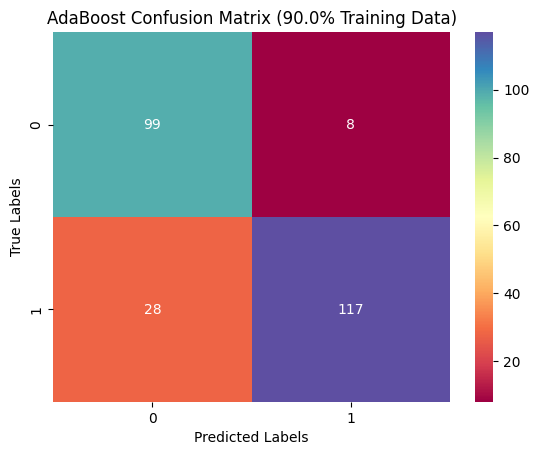

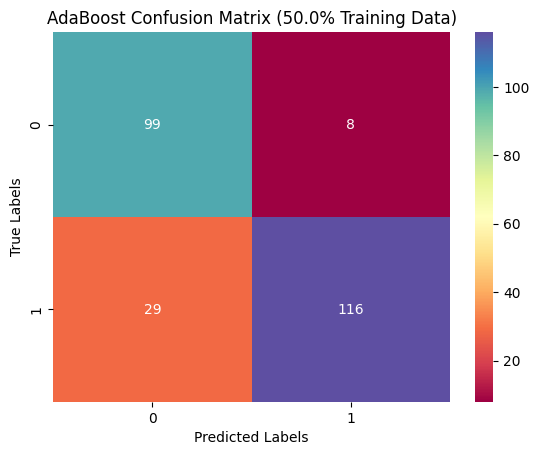

In [37]:
#=======================Calculate the confusion matrix for AdaBoost Classifier Model====================================
for i in range(len(train_set)):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, ab_pred_ls[i])
    cm_cal.append(['AdaBoost Classifier',f'{train_set[i]*100}%', cm])
    # Create a heatmap of the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'AdaBoost Confusion Matrix ({train_set[i]*100}% Training Data)')
    plt.show()
#==========================================================================================================================

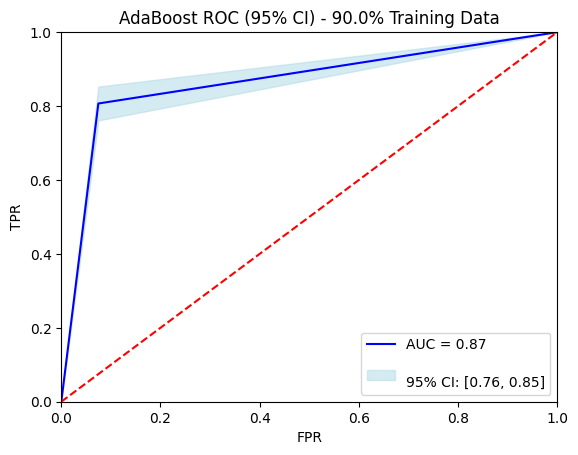

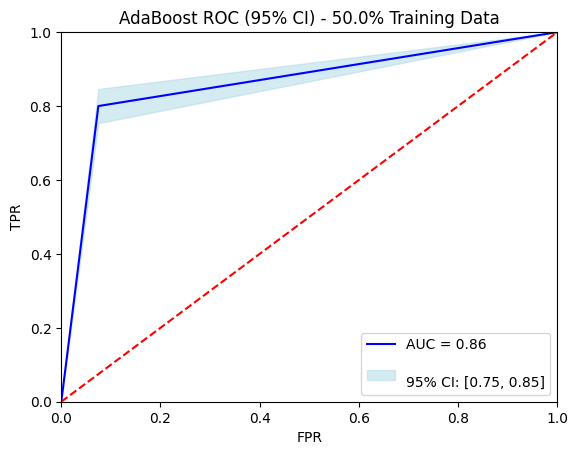

In [38]:
#=================Plotting ROC curve based on AdaBoost Classifier====================(By Abhishek)
for i in range(len(train_set)):
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, ab_pred_ls[i])
    roc_auc = auc(fpr, tpr)
    auc_cal.append(['AdaBoost Classifier',f'{train_set[i]*100}%', roc_auc])
    # Compute the confidence interval
    std_err = np.sqrt(np.divide(tpr * (1 - tpr), y_test.size, where=(y_test.size != 0)) * (fpr + tpr))
    # Compute the confidence interval with explicit broadcasting
    upper_bound = tpr + std_err * 1.96
    lower_bound = tpr - std_err * 1.96
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,label = '\n95%% CI: [%0.2f, %0.2f]' % (lower_bound[1], upper_bound[1]))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'AdaBoost ROC (95% CI) - {train_set[i]*100}% Training Data')
    plt.legend(loc="lower right")
    plt.show()
#=====================================================================================================

## Support Vector Classifier

In [39]:
#=====================Support Vector Classifier Model with different training sets=====================
for elm in train_set:
    clf_SVM = SVC(kernel='sigmoid', probability=True, C = 10, gamma='auto')
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)
    # Fitting the classifier to the training data
    clf_SVM.fit(X_t, y_t)
    
    # Making predictions on the testing data
    y_pred_SVM = clf_SVM.predict(X_test)
    
    # Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_SVM)
    
    print(f'Accuracy score(Support Vector Machine Model): {accuracy} with {elm*100}% training records')

Accuracy score(Support Vector Machine Model): 0.8373015873015873 with 90.0% training records
Accuracy score(Support Vector Machine Model): 0.8333333333333334 with 50.0% training records


In [40]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
}
grid_search = GridSearchCV(estimator=clf_SVM, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [41]:
best_params

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [42]:
best_params['gamma']

'scale'

In [43]:
#=====================Support Vector Classifier Model after Hyper Tuning=====================
for elm in train_set:
    clf_SVM = SVC(kernel='linear', probability=True, C = best_params['C'], gamma=best_params['gamma'])
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)
    # Fitting the classifier to the training data
    clf_SVM.fit(X_t, y_t)
    
    # Making predictions on the testing data
    y_pred_SVM = clf_SVM.predict(X_test)
    svm_pred_ls.append(y_pred_SVM)
    
    # Evaluating the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred_SVM)
    accuracies.append(['Support Vector Classifier',f'{elm*100}%', accuracy])
    
    print(f'Accuracy score(Support Vector Machine Model): {accuracy} with {elm*100}% training records')

Accuracy score(Support Vector Machine Model): 0.8571428571428571 with 90.0% training records
Accuracy score(Support Vector Machine Model): 0.8571428571428571 with 50.0% training records


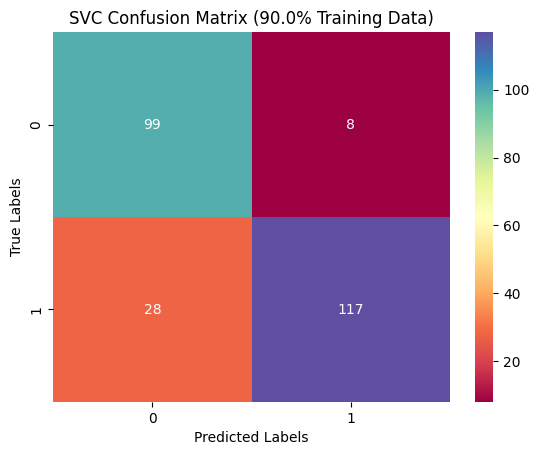

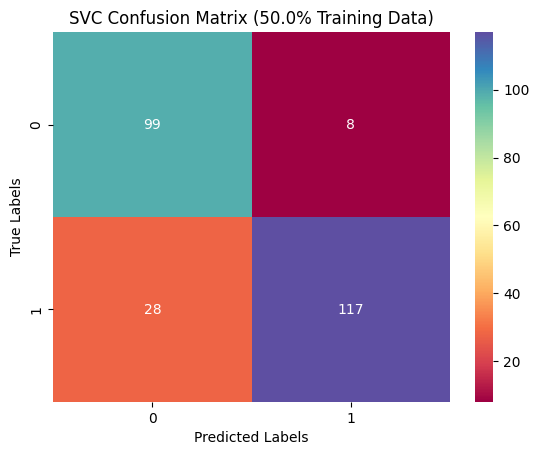

In [44]:
#=======================Calculate the confusion matrix for Support Vector Machine Model====================================
for i in range(len(train_set)):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, svm_pred_ls[i])
    cm_cal.append(['Support Vector Classifier',f'{train_set[i]*100}%', cm])
    # Create a heatmap of the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'SVC Confusion Matrix ({train_set[i]*100}% Training Data)')
    plt.show()
#==========================================================================================================================

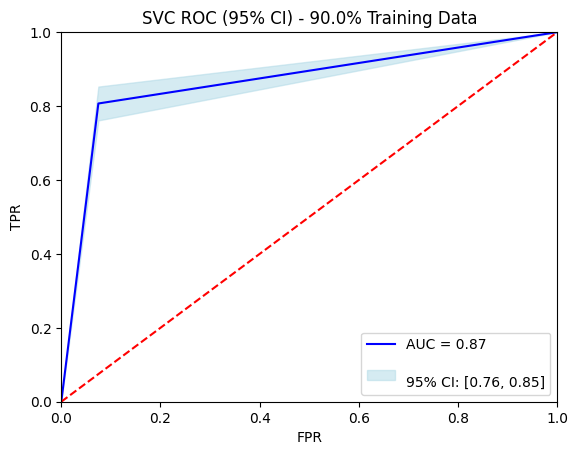

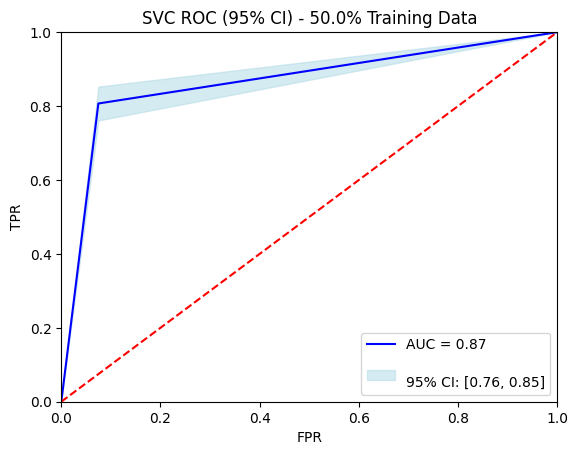

In [45]:
#=================Plotting ROC curve based on Suport Vector Machine====================(By Abhishek)
for i in range(len(train_set)):
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, svm_pred_ls[i])
    roc_auc = auc(fpr, tpr)
    auc_cal.append(['Support Vector Classifier',f'{train_set[i]*100}%', roc_auc])
    # Compute the confidence interval
    std_err = np.sqrt(np.divide(tpr * (1 - tpr), y_test.size, where=(y_test.size != 0)) * (fpr + tpr))
    # Compute the confidence interval with explicit broadcasting
    upper_bound = tpr + std_err * 1.96
    lower_bound = tpr - std_err * 1.96
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,label = '\n95%% CI: [%0.2f, %0.2f]' % (lower_bound[1], upper_bound[1]))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'SVC ROC (95% CI) - {train_set[i]*100}% Training Data')
    plt.legend(loc="lower right")
    plt.show()
#=====================================================================================================

## Pegasos Quantum Support Vector Classifier

In [46]:
#Number of qubits is equal to the number of features
num_qubits = num_features
#Number of steps performed during the training procedure
tau = 1000
#Regularization parameter
C = 10

In [47]:
from qiskit.circuit.library import ZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import PegasosQSVC
feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=3)
qkernel = FidelityQuantumKernel(feature_map=feature_map)

In [48]:
#=====================Pegasos Quantum Support Vector Classifier=========================
for elm in train_set:
    pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C ,num_steps=tau)
    X_t, dummy_x, y_t, dummy_y = train_test_split(X_train, y_train, train_size=elm, random_state=42)
    #Fitting the data
    pegasos_qsvc.fit(X_t, y_t.values)
    #Predicting test data
    pred = pegasos_qsvc.predict(X_test)
    pred_pqsvc.append(pred)
    pegasos_score = accuracy_score(y_test.values, pred)
    accuracies.append(['Pegasos QSVC',f'{elm*100}%', pegasos_score])
    print(f'Accuracy score (Pegasos QSVC Model): {pegasos_score} with {elm*100}%  training records')

Accuracy score (Pegasos QSVC Model): 0.8611111111111112 with 90.0%  training records
Accuracy score (Pegasos QSVC Model): 0.8611111111111112 with 50.0%  training records


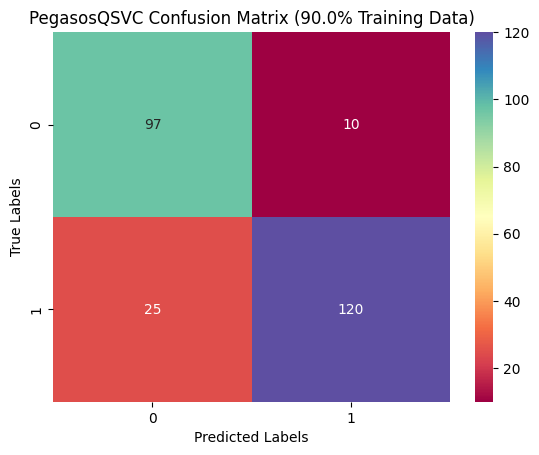

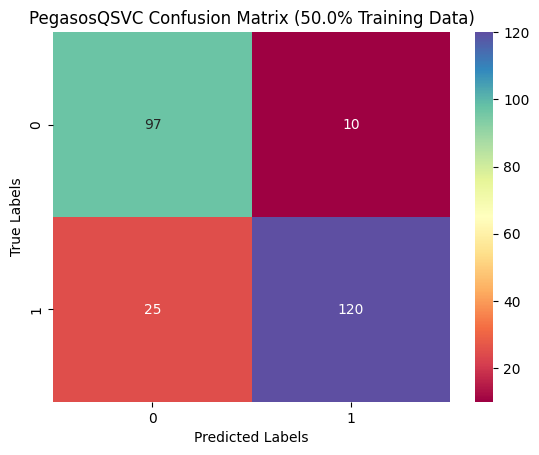

In [49]:
#===========================Calculate the confusion matrix for Pegasos Quantum Support Vector Classifier Model============
for i in range(len(train_set)):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, pred_pqsvc[i])
    cm_cal.append(['Pegasos QSVC',f'{train_set[i]*100}%', cm])
    # Create a heatmap of the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'PegasosQSVC Confusion Matrix ({train_set[i]*100}% Training Data)')
    plt.show()
#=========================================================================================================================

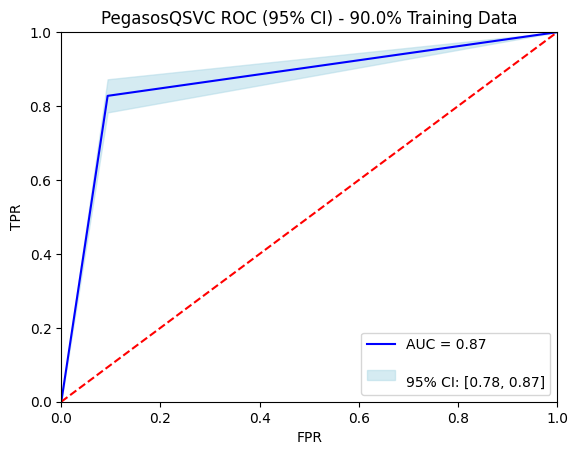

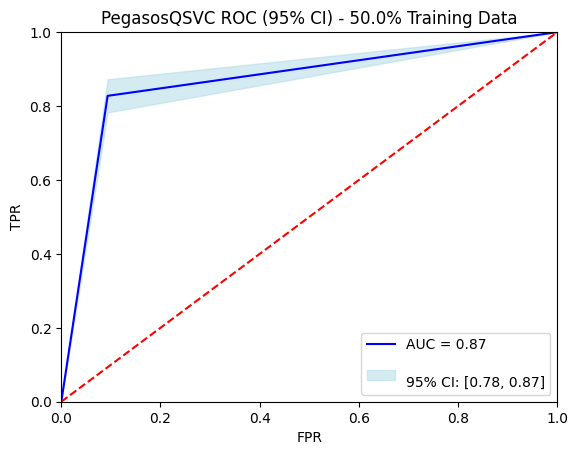

In [50]:
#=================Plotting ROC curve based on Pegasos Quantum Support Vector Classifier model====================(By Abhishek)
for i in range(len(train_set)):
    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, pred_pqsvc[i])
    roc_auc = auc(fpr, tpr)
    auc_cal.append(['Pegasos QSVC',f'{train_set[i]*100}%', roc_auc])
    # Compute the confidence interval
    std_err = np.sqrt(np.divide(tpr * (1 - tpr), y_test.size, where=(y_test.size != 0)) * (fpr + tpr))
    # Compute the confidence interval with explicit broadcasting
    upper_bound = tpr + std_err * 1.96
    lower_bound = tpr - std_err * 1.96
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='b', label='AUC = %0.2f' % roc_auc)
    plt.fill_between(fpr, lower_bound, upper_bound, color='lightblue', alpha=0.5,label = '\n95%% CI: [%0.2f, %0.2f]' % (lower_bound[1], upper_bound[1]))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'PegasosQSVC ROC (95% CI) - {train_set[i]*100}% Training Data')
    plt.legend(loc="lower right")
    plt.show()
#====================================================================================================

In [51]:
#=====================Creating dataFrame based on accuracies of model==========================
df =  pd.DataFrame(accuracies,columns=['Model','Training Data in %','Accuracy'])
#=========Creating dataframe for model trained with 90% training data================
mod1_df = df[df['Training Data in %']=='90.0%']
#=========Creating dataframe for model trained with 50% training data================
mod2_df = df[df['Training Data in %']=='50.0%']

In [52]:
pd.options.mode.chained_assignment = None
mod1_df.sort_values(by=['Accuracy'],inplace=True,ascending=False)

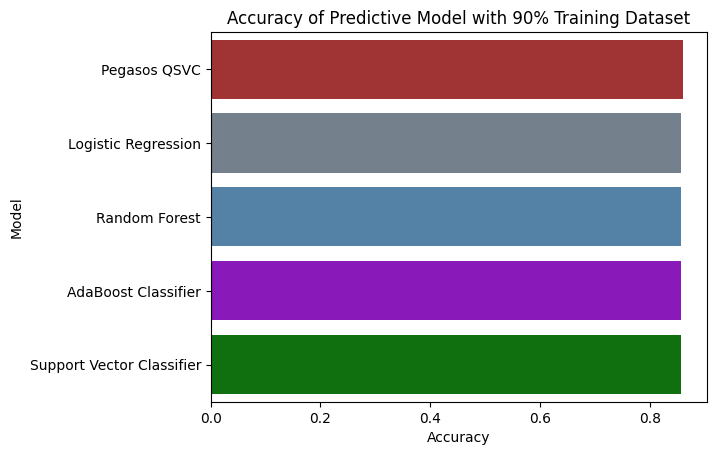

In [53]:
palette=['firebrick','slategray','steelblue', 'darkviolet', 'green']
sns.barplot(data=mod1_df, x='Accuracy', y='Model', hue='Model', palette=palette)
plt.title('Accuracy of Predictive Model with 90% Training Dataset')
plt.show()

In [54]:
mod2_df.sort_values(by=['Accuracy'],inplace=True,ascending=False)

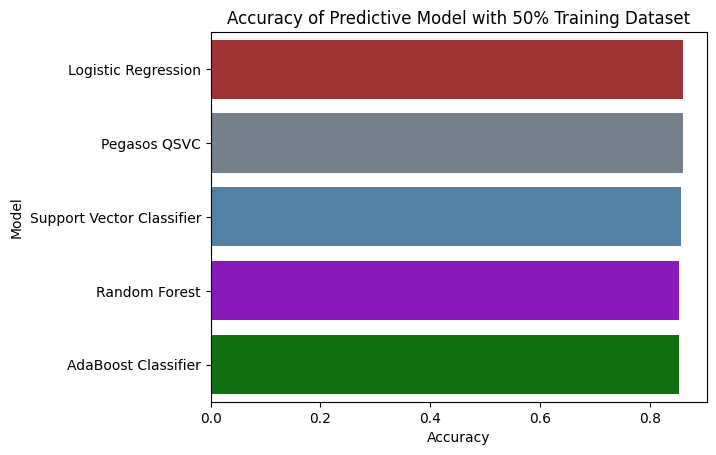

In [55]:
palette=['firebrick','slategray','steelblue', 'darkviolet', 'green']
sns.barplot(data=mod2_df, x='Accuracy', y='Model', hue='Model', palette=palette)
plt.title('Accuracy of Predictive Model with 50% Training Dataset')
plt.show()

# <center><h1><b>References</b></h1></center>
<ul><li><p>Quantum machine learning algorithms (qiskit_machine_learning.algorithms) - Qiskit Machine Learning 0.7.0. (n.d.).
<a href='
https://qiskit.org/ecosystem/machine-learning/apidocs/qiskit_machine_learning.algorithms.html#module-qiskit_machine_learning.algorithm'>Qiskit Machine Learning URL </a>s</p></li>
</ul>